# WeatherPy

###  This file will pull data from openweathermap.org's api.  It will run through a list of over 500 cities looking at Temperature, Humidity, Cloudiness (as a percentage of the sky) and Wind Speed as it related to the city's latitude.  Linear regression equation will be determined through a scatterplot on each of the factors against latitude for both the Northern and Southern Hemisphere.

In [2]:
# Import the necessary libraries
import matplotlib.pyplot as plt # Plotting library
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 
import seaborn as sns
import json

from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print("All necessary libraries installed")

All necessary libraries installed


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Latitude: list of 1500 random numbers from uniform distribution 
lats = np.random.uniform(low=-90.000, high=+90.000, size=1500)
# Longitude: list of 1500 random numbers from uniform distribution
lngs = np.random.uniform(low=-180.000, high=+180.000, size=1500)
lat_lngs = zip(lats, lngs) # Create an iterator using zip()

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # Find the city name nearest to the random latitude & longitude
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

print(cities)

['coihaique', 'axim', 'rafaela', 'batagay', 'punta arenas', 'port alfred', 'saint-philippe', 'kapaa', 'east london', 'busselton', 'rikitea', 'cherskiy', 'half moon bay', 'jumla', 'carnarvon', 'taolanaro', 'puerto escondido', 'barrow', 'port elizabeth', 'hermanus', 'yining', 'castro', 'rawson', 'wukari', 'dogondoutchi', 'chapada dos guimaraes', 'hofn', 'hobart', 'cidreira', 'cockburn town', 'narsaq', 'jiddah', 'mataura', 'prieska', 'joshimath', 'rorvik', 'iqaluit', 'talkha', 'vao', 'igra', 'bengkulu', 'illoqqortoormiut', 'poshekhonye', 'bluff', 'atar', 'yellowknife', 'puro', 'kudahuvadhoo', 'husavik', 'nara', 'vaini', 'marzuq', 'tiksi', 'adrar', 'sentyabrskiy', 'atuona', 'vardo', 'lompoc', 'umzimvubu', 'bac lieu', 'jalu', 'harer', 'mithimna', 'esperance', 'wanning', 'albany', 'karera', 'thompson', 'cap-aux-meules', 'haibowan', 'khatanga', 'torbay', 'port-gentil', 'huarmey', 'sao joao da barra', 'bathsheba', 'barentsburg', 'acapulco', 'peleduy', 'avarua', 'mier', 'bethel', 'veinticinco d

In [4]:
print(len(cities))

617


In [5]:

# Let's create a base url for the openweathermap and check response for one city
base_url = "http://api.openweathermap.org/data/2.5/weather?"
mycity = "San Francisco"
units = "Imperial" #This will give you temperature in Fahrenheit

# Build query URL
query_url = base_url + "appid=" + weather_api_key + "&q=" + mycity + "&units=" + units

# Get weather data for my city
mycity_json = requests.get(query_url).json()
# Print the json (pretty printed)
print(json.dumps(mycity_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 37.77,
        "lon": -122.42
    },
    "dt": 1602182759,
    "id": 5391959,
    "main": {
        "feels_like": 53.15,
        "humidity": 72,
        "pressure": 1015,
        "temp": 59.99,
        "temp_max": 63,
        "temp_min": 57
    },
    "name": "San Francisco",
    "sys": {
        "country": "US",
        "id": 5817,
        "sunrise": 1602166315,
        "sunset": 1602207711,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 12.75
    }
}


In [11]:
# Let's create empty lists to hold the responses from API calls
City = []
Country = []
Date = []
Latitude = []
Longitude = []
Humidity = []
Pressure = []
Temp= []
Max_Temp = []
Cloudiness = []
Wind_speed = []

# Display the start of Data Retrieval
print(f"****** Beginning Data Retrieval *********")

# Let's loop through each city in the cities list
for index, city in enumerate(cities):
    # Build query URL
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    # Get weather data for my city
    city_json = requests.get(query_url).json()
    # Try to grab the height and mass of characters if they are available in the Star Wars API
    try:
        City.append(city_json["name"])
        Country.append(city_json["sys"]["country"])
        Date.append(city_json["dt"])
        Latitude.append(city_json["coord"]["lat"])
        Longitude.append(city_json["coord"]["lon"])
        Humidity.append(city_json["main"]["humidity"])
        Pressure.append(city_json["main"]["pressure"])
        Temp.append(city_json["main"]["temp"])
        Max_Temp.append(city_json["main"]["temp_max"])
        Cloudiness.append(city_json["clouds"]["all"])
        Wind_speed.append(city_json["wind"]["speed"])
        print("Index : {}, City: {} found ! Collected weather data" .format(index, city))
        
    # Handle exceptions for cities that citipy cannot find
    except:
        # Append null values
        print("Index : {}, City: {} Not found ! Skipping.." .format(index, city))
        pass
print(f"****** Data Retrieval Complete **********")

ollected weather data
Index : 277, City: clyde river found ! Collected weather data
Index : 278, City: butaritari found ! Collected weather data
Index : 279, City: rokytne found ! Collected weather data
Index : 280, City: shingu found ! Collected weather data
Index : 281, City: maceio found ! Collected weather data
Index : 282, City: osa found ! Collected weather data
Index : 283, City: qui nhon found ! Collected weather data
Index : 284, City: mahebourg found ! Collected weather data
Index : 285, City: visnes found ! Collected weather data
Index : 286, City: rio gallegos found ! Collected weather data
Index : 287, City: karaul Not found ! Skipping..
Index : 288, City: mount isa found ! Collected weather data
Index : 289, City: krasnogvardeyets found ! Collected weather data
Index : 290, City: madimba found ! Collected weather data
Index : 291, City: frontera found ! Collected weather data
Index : 292, City: arraial do cabo found ! Collected weather data
Index : 293, City: huoqiu found

In [12]:
 # To convert timestamp to datestamp
# Let's create a dataframe with the responses obtained by the API
df_weather = pd.DataFrame({
    "City": City,
    "Country": Country,
    "Date": Date,
    "Latitude": Latitude,
    "Longitude": Longitude,
    "Humidity": Humidity,
    "Pressure": Pressure,
    "Temp" : Temp,
    "Max_Temp": Max_Temp,
    "Cloudiness": Cloudiness,
    "Wind_Speed": Wind_speed    
    })
print("The shape of the {} dataframe is: {}" .format("df_weather",df_weather.shape))
df_weather.head(10)

The shape of the df_weather dataframe is: (569, 11)


,City,Country,Date,Latitude,Longitude,Humidity,Pressure,Temp,Max_Temp,Cloudiness,Wind_Speed
0,Coyhaique,CL,1602183211,-45.58,-72.07,54,1013,53.60,53.60,75,10.29
1,Esim,GH,1602183211,4.87,-2.24,89,1012,76.91,76.91,93,9.73
2,Rafaela,AR,1602183013,-31.25,-61.49,18,1012,86.00,86.00,0,1.01
3,Batagay,RU,1602183211,67.63,134.63,95,1016,24.94,24.94,99,3.06
4,Punta Arenas,CL,1602183211,-53.15,-70.92,50,1000,53.60,53.60,40,34.45
5,Port Alfred,ZA,1602183211,-33.59,26.89,88,1012,65.70,65.70,81,9.10
6,Saint-Philippe,RE,1602183130,-21.36,55.77,88,1016,69.06,73.40,13,4.70
7,Kapaa,US,1602183135,22.08,-159.32,69,1017,79.63,82.40,40,10.29
8,East London,ZA,1602183129,-33.02,27.91,93,1011,66.20,66.20,20,11.41
9,Busselton,AU,1602183212,-33.65,115.33,74,1008,50.36,52.00,100,3.49


### Export the data to an output .csv file

In [13]:
# Set the path for output data as a variable
output_path = "output_files/WeatherByCities_20201008.csv"
# Save the dataframe to the output file
df_weather.to_csv(output_path, index=False, encoding="utf-8")

### City Latitude vs. Temperature Plot

In [14]:
#Let's create lists for the use of scattering!
Latitude = df_weather["Latitude"]
Temp = df_weather["Temp"]
Humidity = df_weather["Humidity"]
Wind_Speed = df_weather["Wind_Speed"]
Cloudiness = df_weather["Cloudiness"]
today =  pd.to_datetime("today").date()



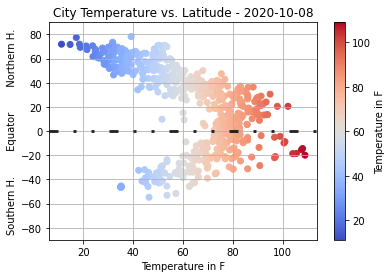

In [15]:
# Build a scatter plot of Temperature vs Latitude

plt.scatter(Temp, Latitude, c=Temp, cmap = "coolwarm")


# Incorporate the other graph properties.  We will be applying bounds to the y axis limits, adding a title along with labels to the x-axis, y-axis and colorbar, applying agrid, and inserting a line at the equator for greater visibiliy.

plt.ylim(-90,90)
plt.title(f"City Temperature vs. Latitude - {today}")
cbar = plt.colorbar()
cbar.set_label('Temperature in F')
plt.xlabel("Temperature in F")
plt.ylabel("Southern H.        Equator        Northern H.")
plt.grid(True)
equatorLine = (0, (3, 5, 1, 5, 1, 5))
plt.axhline(0, linestyle = equatorLine, color = "black", linewidth =3,alpha = .8)


# Save the figure
plt.savefig(f"output_files/Scatterplots/Lat_vs_Temp_{today}.png")


# Show plot
plt.show()

##  Temperature of Cities vs Latitude Thoughts

For this chart along with the following three charts, over 600 cities were selected based off of their proximity to a latitude and longitude number randomly chosen.  While each chart represents a different scatterplot, the overall concept is the same (Meteorological Condition vs. Latitude)

I modified the charts from the original sample given to us to hopefully provide a little more color commentary to the data.  These will be the focus of our discussion in the next four blurbs.

You will notice that i used the temperature variable rather than the max_temp variable.  The max temperature is actually saying: give me all the weather stations for that city.  Now tell me, "What is the maximum value for temperature at that time?" Likewise, minimum temperature is calculated the same. I will have more to say on this after wind speed vs latitude scatterplot.

### City Latitude vs. Humidity Plot

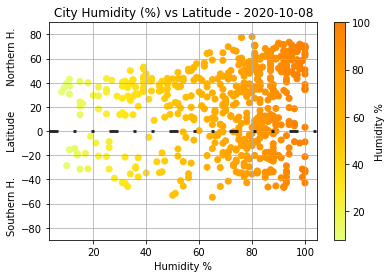

In [16]:
# Build a scatter plot for each data type
plt.scatter(Humidity, Latitude, c=Humidity, cmap = "Wistia")


# Incorporate the other graph properties.  We will be applying bounds to the y axis limits, adding a title along with labels to the x-axis, y-axis and colorbar, applying agrid, and inserting a line at the equator for greater visibiliy.

plt.ylim(-90,90)
plt.title(f"City Humidity (%) vs Latitude - {today}")
cbar = plt.colorbar()
cbar.set_label('Humidity %')
plt.xlabel("Humidity %")
plt.ylabel("Southern H.        Latitude        Northern H.")
equatorLine = (0, (3, 5, 1, 5, 1, 5))
plt.axhline(0, linestyle = equatorLine, color = "black", linewidth =3,alpha = .8)
plt.grid(True)

# Save the figure
plt.savefig(f"output_files/Scatterplots/Lat_vs_Humidity_{today}.png")

# Show plot
plt.show()

## City Humidity vs Latitude Thoughts

In the sample charts provided, latitude was the x-axis variable.  This runs counter-intuitive to our thinking spatially regardins maps of the world.  If we were to look at a map of the world or at a globe or map of the world, chances are we see the equator perpendicular to the y-axis.  I flipped the axes so that we can view the results in a similar format.

### City Latitude vs. Cloudiness Plot

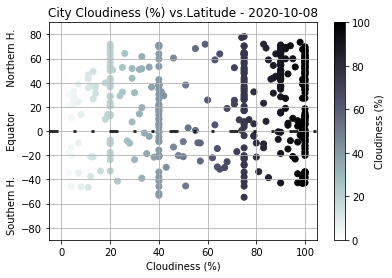

In [17]:
# Build a scatter plot for each data type

plt.scatter(Cloudiness, Latitude, c=Cloudiness, cmap="bone_r")

# Incorporate the other graph properties.  We will be applying bounds to the y axis limits, adding a title along with labels to the x-axis, y-axis and colorbar, applying agrid, and inserting a line at the equator for greater visibiliy.

plt.ylim(-90,90)
plt.title(f"City Cloudiness (%) vs.Latitude - {today}")
cbar = plt.colorbar()
cbar.set_label('Cloudiness (%)')
plt.xlabel("Cloudiness (%)")
plt.ylabel("Southern H.        Equator        Northern H.")
plt.grid(True)
equatorLine = (0, (3, 5, 1, 5, 1, 5))
plt.axhline(0, linestyle = equatorLine, color = "black", linewidth =3,alpha = .8)


# Save the figure
plt.savefig(f"output_files/Scatterplots/Lat_vs_Cloud_{today}.png")


# Show plotk
plt.show()

## City Cloudiness vs Latitude

In each of the four charts, I enhanced the way the data is portrayed by using colormaps.  In matplotlib, one of my favorite ways to bring a little more color commentary (no pun intended) to a chart is to use colormaps.  There are a wide variety of colormaps avialable.  Each colormap I chose was relaetd to the data at hand.
 - For the temperature scatterplot, I chose the colormap "coolwarm". This allows colders temperatures in blue along with warmer temperatures in red. 
 - For the humidity scatterplot, I chose the colormap "Wistia".  This colormap is yelllow to orange which are colors often associate with warmth.  While humidity is certainly not the primary factor of warmth, it certainly a secondary factor as anyone living in Austin in June can attest. 
 - For the cloudiness scatterplot, I chose the colormap "bone".  Bone, in reverse, allows us to have a gradient which gives us almost translucent data points for little cloud cover to opaque black data points for total cloud coveage.
 - For the wind speed scatterplot, I chose the colormap "winter".  Winter typically has bone-jarring winds with strong cold fronts from either Polar or Arctic vortices.

### City Latitude vs. Windspeed

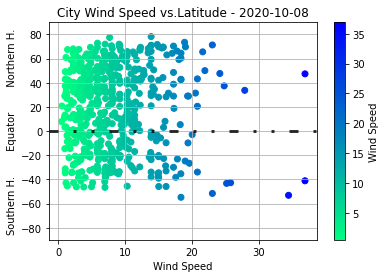

In [18]:
# Build a scatter plot for each data type

plt.scatter(Wind_Speed, Latitude, c=Wind_Speed, cmap="winter_r")    

# Incorporate the other graph properties.  We will be applying bounds to the y axis limits, adding a title along with labels to the x-axis, y-axis and colorbar, applying agrid, and inserting a line at the equator for greater visibiliy.

plt.ylim(-90,90)
plt.title(f"City Wind Speed vs.Latitude - {today}")
cbar = plt.colorbar()
cbar.set_label('Wind Speed')
plt.xlabel("Wind Speed")
plt.ylabel("Southern H.        Equator        Northern H.")
plt.grid(True)
equatorLine = (0, (3, 5, 1, 5, 1, 5))
plt.axhline(0, linestyle = equatorLine, color = "black", linewidth =3,alpha = .8)


# Save the figure
plt.savefig(f"output_files/Scatterplots/Lat_vs_WSpeed_{today}.png")


# Show plot
plt.show()

## Wind Speed vs Latitude

So why are there minimum and maximum temperature data points provided for each city, especially if they aren't the daily minimum and mmaximum temperatures?
Many coastal cities with hilly basins are subject a condition called microclimates.  San Francisco is a prime example of this occurring.  Mark Twain never said it, but there is a quote that states, "The coldest winter I ever spent was a summer in San Francisco." 
On a typical Wednesday in June at 3PM, depending on where you were at in the city, the temperature you would feel could wildly different.
- You could be at Oracle Park in China Basin enjoying a Giants game during the day.  It's sunny, 80 degrees.  
- You could be in Glen Park shielded by the straight line coastal wind, but experience a temperature in the 60s. 
- Or you could be visiting the Sutro Bath ruins on the Pacific Coast.  Temperature there? 52 degrees.

On this day at this time, you might see the following conditions:
- Temperature - 64 degrees
- Maximum Temperature - 80 degrees
- Minimum Temperature - 52 degrees

## Linear Regressions

In [20]:
# Create Northern and Southern Hemisphere DataFrames. Reverse Latitudes in Southern Hemisphere so charts will have identical x-axes.

df_north = df_weather.loc[df_weather["Latitude"]>0]
df_south = df_weather.loc[df_weather["Latitude"]<0]
df_south["Latitude"] = df_south["Latitude"] * -1

# Create dataset of cities and their weather that are on the equator.  Run Pandas shape function to identify how many cities fall into this bucket.
df_equator = df_weather.loc[df_weather["Latitude"]==0]
df_equator.shape


(0, 11)

In [21]:
# Create lists from df_north (Temperature, Humidity, Cloudiness and Wind Speed).  Add an s to the front of the list names.

nLat = df_north["Latitude"]
nTemp = df_north["Temp"]
nHumidity = df_north["Humidity"]
nCloud = df_north["Cloudiness"]
nWSpeed = df_north["Wind_Speed"]


# Create lists from df_south (Temperature, Humidity, Cloudiness and Wind Speed).  Add an s to the front of the list names.

sLat = df_south["Latitude"]
sTemp = df_south["Temp"]
sHumidity = df_south["Humidity"]
sCloud = df_south["Cloudiness"]
sWSpeed = df_south["Wind_Speed"]


###  Northern Hemisphere - Temp vs. Latitude Linear Regression.  


The linear regression is indicated by the dashed red line on the chart
The equation for this linear regression is: y = -0.85x + 90.61
The r-squared is: 0.7014943008239835


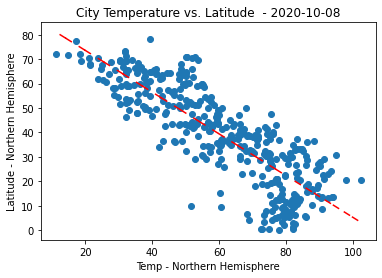

In [24]:
# Setting the x_values and y_values for the linear regression
x_values = nTemp
y_values = nLat
linestyle = (0, (5, 10))

#Calculating the linear regression
(slope, intercept, rvalue, _, _) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graphing the scatterplot and linear regression equation.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,linestyle = linestyle, color = "red")

#Setting the axis labels and title
plt.ylabel("Latitude - Northern Hemisphere")
plt.xlabel("Temp - Northern Hemisphere")
plt.title(f"City Temperature vs. Latitude  - {today}")

# Save the figure
plt.savefig(f"output_files/Linear_Regression_Plots/Temp_vs_LAT(nHEMI)_{today}.png")


#Printing out the linear regression equation and correlation coefficent
print("The linear regression is indicated by the dashed red line on the chart")
print(f"The equation for this linear regression is: {line_eq}")
print("The r-squared is: {}".format(rvalue**2))
plt.show()

###  Southern Hemisphere - Temp vs. Latitude Linear Regression

The linear regression is indicated by the dashed red line on the chart
The equation for this linear regression is: Linear regress of scatterplot: y = -0.62x + 65.34
The r-squared is: 0.47369984965035533


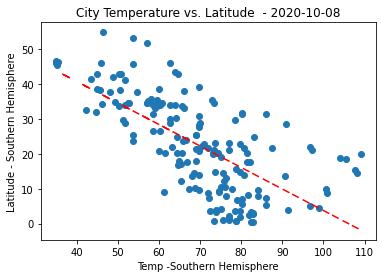

In [27]:
# Setting the x and y values
x_values = sTemp
y_values = sLat
linestyle = (0, (5, 10))

#Calculating the linear regression
(slope, intercept, rvalue, _, _) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "Linear regress of scatterplot: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graphing the scatterplot and linear regression equation.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,linestyle = linestyle, color = "red")

#Setting the axis labels and title
plt.ylabel("Latitude - Southern Hemisphere")
plt.xlabel("Temp -Southern Hemisphere")
plt.title(f"City Temperature vs. Latitude  - {today}")

# Save the figure
plt.savefig(f"output_files/Linear_Regression_Plots/Temp_vs_LAT(sHEMI)_{today}.png")


#Printing out the linear regression equation and correlation coefficent
print("The linear regression is indicated by the dashed red line on the chart")
print(f"The equation for this linear regression is: {line_eq}")
print("The r-squared is: {}".format(rvalue**2))
plt.show()

## Temperature vs Latitude Linear Regression

There appears to be a direct correlation between temperature and the latitude of the city, especially when it came to the Northern Hemisphere where the slope is -1.  The slope is a little bit less in the southern hemisphere (-0.73) \
Perhaps the differnce can be attributed toa lot less land, and subsequently less cities in the Southern Hemisphere.  Additioanlly except for near Tierra del Fuego, Antartica is an ocean away from any other land.  In other words there are basically open seas past 55 degrees South, which does not alllow perhaps  closer relationship between Temperature and latitude.

#

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression is indicated by the dashed red line on the chart
The equation for this linear regression is: y = 0.26x + 20.53
The r-squared is: 0.08686418267489988


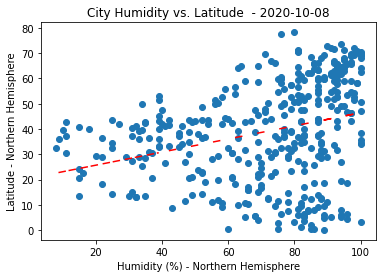

In [28]:
# Setting the x_values and y_values for the linear regression
x_values = nHumidity
y_values = nLat
linestyle = (0, (5, 10))

#Calculating the linear regression
(slope, intercept, rvalue, _, _) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graphing the scatterplot and linear regression equation.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,linestyle = linestyle, color = "red")

#Setting the axis labels and title
plt.ylabel("Latitude - Northern Hemisphere")
plt.xlabel("Humidity (%) - Northern Hemisphere")
plt.title(f"City Humidity vs. Latitude  - {today}")

# Save the figure
plt.savefig(f"Output_Files/Linear_Regression_Plots/Hum_vs_LAT(nHEMI)_{today}.png")


#Printing out the linear regression equation and correlation coefficent
print("The linear regression is indicated by the dashed red line on the chart")
print(f"The equation for this linear regression is: {line_eq}")
print("The r-squared is: {}".format(rvalue**2))
plt.show()


###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression is indicated by the dashed red line on the chart
The equation for this linear regression is: y = -0.02x + 23.85
The r-squared is: 0.0009826037535980872


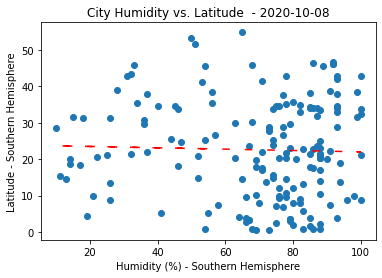

In [29]:
# Setting the x_values and y_values for the linear regression
x_values = sHumidity
y_values = sLat
linestyle = (0, (5, 10))

#Calculating the linear regression
(slope, intercept, rvalue, _, _) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graphing the scatterplot and linear regression equation.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,linestyle = linestyle, color = "red")

#Setting the axis labels and title
plt.ylabel("Latitude - Southern Hemisphere")
plt.xlabel("Humidity (%) - Southern Hemisphere")
plt.title(f"City Humidity vs. Latitude  - {today}")

# Save the figure
plt.savefig(f"Output_Files/Linear_Regression_Plots/Hum_vs_LAT(sHEMI)_{today}.png")


#Printing out the linear regression equation and correlation coefficent
print("The linear regression is indicated by the dashed red line on the chart")
print(f"The equation for this linear regression is: {line_eq}")
print("The r-squared is: {}".format(rvalue**2))
plt.show()


##  Humidity vs Latitude Linear Regression

There is what seems to be a small correlaton between Humidity and the Northern Hemisphere.  But because there is virtually no correlation in the Southern Hemipshere, I would say we need additional analysis to determine if it exists.  My alternative hypothesis is that humidity is more associated with ocean temperatures along with the wind that drive weather patterns and where they come from.

#

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression is indicated by the dashed red line on the chart
The equation for this linear regression is: y = 0.08x + 34.81
The r-squared is: 0.028771532924680918


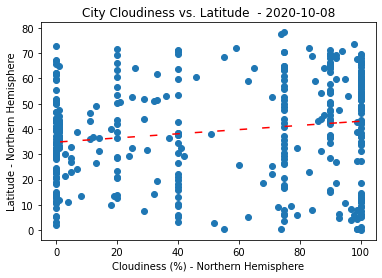

In [30]:
# Setting the x_values and y_values for the linear regression
x_values = nCloud
y_values = nLat
linestyle = (0, (5, 10))

#Calculating the linear regression
(slope, intercept, rvalue, _, _) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graphing the scatterplot and linear regression equation.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,linestyle = linestyle, color = "red")

#Setting the axis labels and title
plt.ylabel("Latitude - Northern Hemisphere")
plt.xlabel("Cloudiness (%) - Northern Hemisphere")
plt.title(f"City Cloudiness vs. Latitude  - {today}")

# Save the figure
plt.savefig(f"Output_Files/Linear_Regression_Plots/Cloud_LAT(nHEMI)_{today}.png")


#Printing out the linear regression equation and correlation coefficent
print("The linear regression is indicated by the dashed red line on the chart")
print(f"The equation for this linear regression is: {line_eq}")
print("The r-squared is: {}".format(rvalue**2))
plt.show()


###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression is indicated by the dashed red line on the chart
The equation for this linear regression is: y = -0.08x + 26.35
The r-squared is: 0.0487959123988725


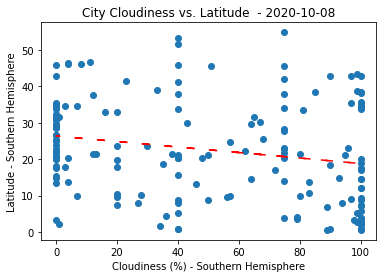

In [31]:
# Setting the x_values and y_values for the linear regression
x_values = sCloud
y_values = sLat
linestyle = (0, (5, 10))

#Calculating the linear regression
(slope, intercept, rvalue, _, _) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graphing the scatterplot and linear regression equation.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,linestyle = linestyle, color = "red")

#Setting the axis labels and title
plt.ylabel("Latitude - Southern Hemisphere")
plt.xlabel("Cloudiness (%) - Southern Hemisphere")
plt.title(f"City Cloudiness vs. Latitude  - {today}")

# Save the figure
plt.savefig(f"Output_Files/Linear_Regression_Plots/Cloud_LAT(sHEMI)_{today}.png")


#Printing out the linear regression equation and correlation coefficent
print("The linear regression is indicated by the dashed red line on the chart")
print(f"The equation for this linear regression is: {line_eq}")
print("The r-squared is: {}".format(rvalue**2))
plt.show()


## Cloud Cover vs Latitude Linear Regression Analysis.

This is a challenging analysis to perform. I would even venture to say that it was not set up in a way to make any conclusions.  Cloudiness is more of a subjective variable based on a meterologist's observations.  Additionally, the varible is rounded to the near tenth(%), which does not give great scatter.

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression is indicated by the dashed red line on the chart
The equation for this linear regression is: y = 0.62x + 34.29
The r-squared is: 0.02637978077289688


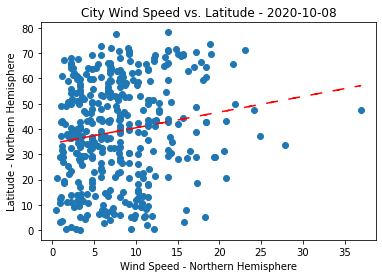

In [32]:
# Setting the x_values and y_values for the linear regression
x_values = nWSpeed
y_values = nLat
linestyle = (0, (5, 10))

#Calculating the linear regression
(slope, intercept, rvalue, _, _) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graphing the scatterplot and linear regression equation.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,linestyle = linestyle, color = "red")

#Setting the axis labels and title
plt.ylabel("Latitude - Northern Hemisphere")
plt.xlabel("Wind Speed - Northern Hemisphere")
plt.title(f"City Wind Speed vs. Latitude - {today}")

# Save the figure
plt.savefig(f"Output_Files/Linear_Regression_Plots/WindSpeed_LAT(nHEMI)_{today}.png")


#Printing out the linear regression equation and correlation coefficent
print("The linear regression is indicated by the dashed red line on the chart")
print(f"The equation for this linear regression is: {line_eq}")
print("The r-squared is: {}".format(rvalue**2))
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression is indicated by the dashed red line on the chart
The equation for this linear regression is: y = 0.56x + 17.73
The r-squared is: 0.06262870396428938


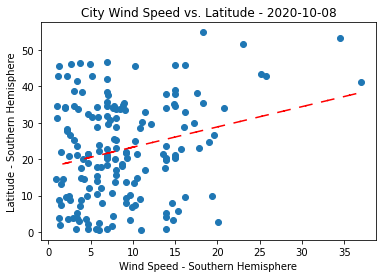

In [33]:
# Setting the x_values and y_values for the linear regression
x_values = sWSpeed
y_values = sLat
linestyle = (0, (5, 10))

#Calculating the linear regression
(slope, intercept, rvalue, _, _) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Graphing the scatterplot and linear regression equation.
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,linestyle = linestyle, color = "red")

#Setting the axis labels and title
plt.ylabel("Latitude - Southern Hemisphere")
plt.xlabel("Wind Speed - Southern Hemisphere")
plt.title(f"City Wind Speed vs. Latitude - {today}")

# Save the figure
plt.savefig(f"Output_Files/Linear_Regression_Plots/WindSpeed_LAT(sHEMI)_{today}.png")


#Printing out the linear regression equation and correlation coefficent
print("The linear regression is indicated by the dashed red line on the chart")
print(f"The equation for this linear regression is: {line_eq}")
print("The r-squared is: {}".format(rvalue**2))
plt.show()


## Wind Speed vs Latitude 

In terms of these graphs, wind speed has a negative correlation with Latitude in the Northern Hemisphere and a positive correlation in the Southern. We saw a roughly similar situation happening with our humidity vs Latitude linear regressions. Therefore we probably need to run additional data to determine if there is that correlation pans out. However, my guess is that it two separate data point with little to no correlation.